   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6          0.0       0.0           44.0   
1      7.4     25.1       0.0          0.0       0.0           44.0   
2     12.9     25.7       0.0          0.0       0.0           46.0   
3      9.2     28.0       0.0          0.0       0.0           24.0   
4     17.5     32.3       1.0          0.0       0.0           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          20.0          24.0         71.0         22.0       1007.7   
1           4.0          22.0         44.0         25.0       1010.6   
2          19.0          26.0         38.0         30.0       1007.6   
3          11.0           9.0         45.0         16.0       1017.6   
4           7.0          20.0         82.0         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday_No  \
0       1007.1       8.0       0.0     16.9     21.8          True   


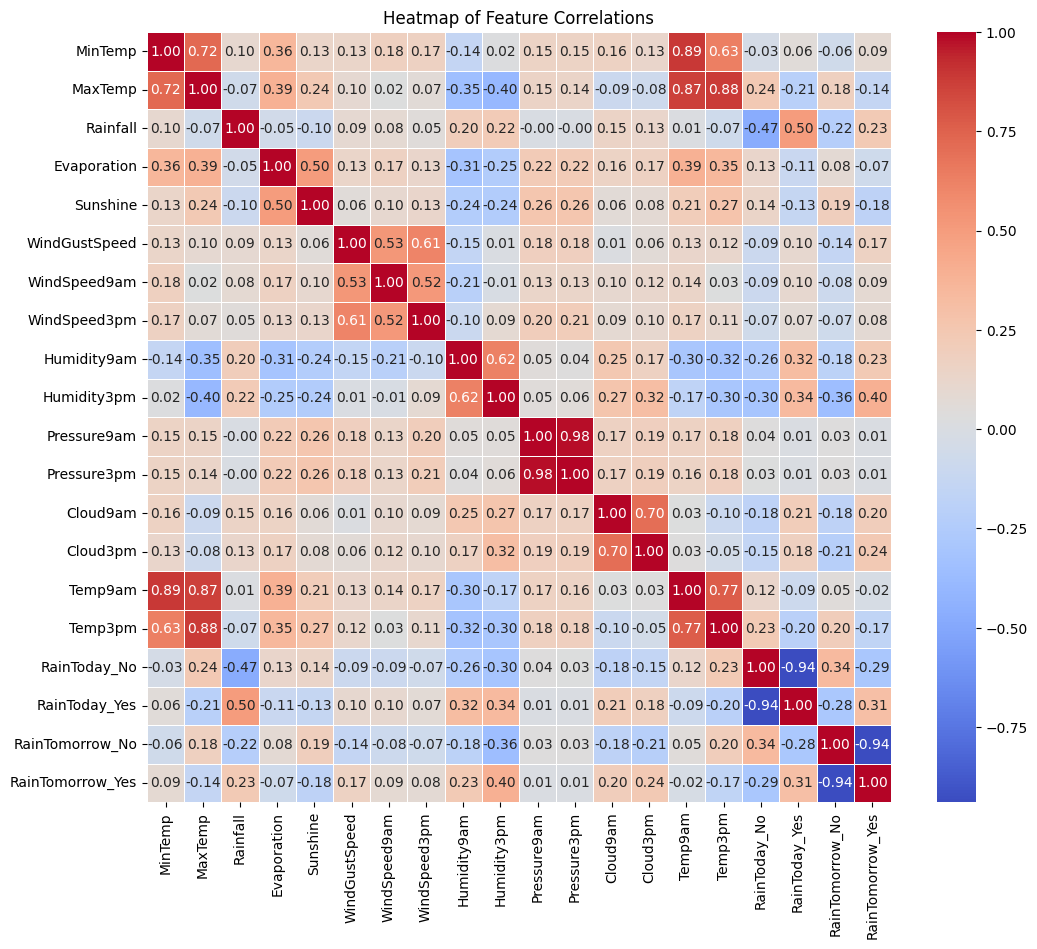

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
data = pd.read_csv(r"C:\Users\asus\Downloads\Clustering_dataset\weatherAUS.csv")
data = pd.get_dummies(data, columns=['RainToday','RainTomorrow'])
features_to_drop = ['Date','WindDir9am','WindDir3pm','WindGustDir','Location']
data=data.drop(columns=features_to_drop)
data = data.fillna(0)
print(data.head())
correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Feature Correlations')
plt.show()


In [14]:
data=data.drop(columns=['MinTemp', 'Temp9am','Temp3pm','Pressure3pm'])

print(np.isnan(data).any())
scaler = StandardScaler()
data = scaler.fit_transform(data)

MaxTemp             False
Rainfall            False
Evaporation         False
Sunshine            False
WindGustSpeed       False
WindSpeed9am        False
WindSpeed3pm        False
Humidity9am         False
Humidity3pm         False
Pressure9am         False
Cloud9am            False
Cloud3pm            False
RainToday_No        False
RainToday_Yes       False
RainTomorrow_No     False
RainTomorrow_Yes    False
dtype: bool


In [15]:
def clustering(data, cluster_count, tolerance=0.001):
    # np.random.seed(Random_seed)  for testing reproduceability
    centroids = data[np.random.choice(len(data), cluster_count, replace=False)]

    while True:
        distances_squared = np.linalg.norm(data[:, np.newaxis, :] - centroids, axis=2) ** 2
        cluster_updating = np.argmin(distances_squared, axis=1)

        centroid_updating = np.array([data[cluster_updating == i].mean(axis=0) for i in range(cluster_count)])

        if np.linalg.norm(centroid_updating - centroids) < tolerance:
            cluster_set = cluster_updating
            break

        centroids = centroid_updating

    return cluster_set, centroids

In [24]:
def calculate_inertia(data, centroids, cluster_set):
    return np.sum((data - centroids[cluster_set]) ** 2)


def find_optimal_cluster(data, cluster_count, iterations=10):
    optimal_inertia = float('inf')
    optimal_result = None

    for _ in range(iterations):
        cluster_set, centroids = clustering(data, cluster_count)

        inertia = calculate_inertia(data, centroids, cluster_set)
        if optimal_inertia > inertia:
            inertia, optimal_inertia = optimal_inertia, inertia
            optimal_result = (cluster_set, centroids)

    return optimal_result

In [25]:
from sklearn.decomposition import PCA
def PCAdecomposition(data, cluster_set):
    pca = PCA()
    transformed_data = pca.fit_transform(data)
    plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=cluster_set, cmap='viridis')
    plt.title('K-means Clustering with PCA Visualization')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()


[0 0 2 ... 0 0 0]
[[-0.25370703 -0.24885632 -0.54201156 -0.52418809 -0.45658253 -0.46594635
  -0.44393662  0.16517487 -0.03565776 -0.34128489 -0.37948205 -0.40555999
   0.42035387 -0.44976068  0.27486629 -0.30084718]
 [-0.42247469  0.71340108 -0.2046822  -0.28627243  0.29586631  0.25796895
   0.23436396  0.60142155  0.79792583  0.12363595  0.55706257  0.56295691
  -1.27673698  1.30977402 -0.90123896  0.93039033]
 [ 0.62717118 -0.25966121  0.79851849  0.84077128  0.30940614  0.34985566
   0.34218778 -0.6614856  -0.57686937  0.30691879  0.01579137  0.0419993
   0.49422359 -0.48514132  0.37466841 -0.36661568]]


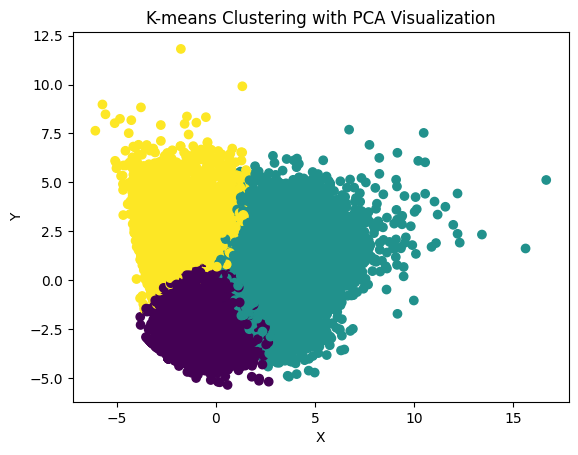

In [26]:
cs, c = find_optimal_cluster(data, 3)

print(cs)
print(c)

PCAdecomposition(data, cs)